In [2]:
from astropy.coordinates import SkyCoord
from dustmaps.bayestar import BayestarQuery
import astropy.units as u

%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
zpsr = np.load('output/zeropoint_kep.npy')
extinctions = np.load('output/extinctions.npy')

data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev_crowding.csv')
ind = abs(data.crMeanPSFMag.values - data.rMeanPSFMag.values) < .1
data = data.iloc[ind]

cam = 2
ind = data['campaign'].values == cam
d = data.iloc[ind].copy()

channel_inds = d['Channel'].values
camp_inds = d['campaign'].values
slr = zpsr[camp_inds-1,channel_inds-1]
slr[slr == 0] = np.nan
exs = extinctions[camp_inds-1,channel_inds-1]
exs[slr == 0] = np.nan

In [4]:
d

,ID,campaign,Kpmag,RAJ2000,DecJ2000,objID,ps_score,raMean,decMean,raMeanErr,...,cgMeanPSFMag,crMeanPSFMag,ciMeanPSFMag,czMeanPSFMag,cyMeanPSFMag,cgMeanPSFMagErr,crMeanPSFMagErr,ciMeanPSFMagErr,czMeanPSFMagErr,cyMeanPSFMagErr
315,202515599,2,15.263,242.564243,-29.398958,72722425642101433,0.995833,242.564160,-29.399099,0.00857,...,19.136600,17.77260,15.930900,14.935800,14.39450,0.013102,0.030485,0.003833,0.002499,0.003991
318,202518093,2,15.020,243.506034,-29.388944,72732435059413662,0.956250,243.505892,-29.388846,0.00297,...,16.925200,15.63840,14.730700,14.326100,14.13390,0.000764,0.002887,0.002401,0.007175,0.005233
323,202520669,2,14.756,244.278470,-29.378375,72742442785226290,0.982000,244.278554,-29.378315,0.00678,...,16.271700,14.99560,14.093300,13.639300,13.42210,0.006641,0.001927,0.003569,0.001384,0.001518
429,202548310,2,15.078,243.813353,-29.268769,72872438134357823,0.982083,243.813429,-29.268761,0.00263,...,16.588234,15.33352,14.437037,13.985434,13.76489,0.047049,0.017639,0.013275,0.062232,0.102026
445,202551457,2,12.312,243.062152,-29.256104,72892430621762965,0.983958,243.062162,-29.256109,0.01029,...,14.529400,13.73810,13.381500,13.181000,13.06020,0.001657,0.001315,0.001000,0.000548,0.003532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747,205737042,2,14.916,249.136534,-15.335889,89592491364917298,0.985250,249.136481,-15.335876,0.00213,...,16.754700,15.32570,14.521900,14.056100,13.75320,0.002727,0.002167,0.001639,0.002040,0.003349
21774,205738442,2,14.782,249.337569,-15.322620,89612493377042966,0.998750,249.337671,-15.322863,0.00148,...,15.869500,14.85260,14.277300,13.952400,13.72650,0.002614,0.005475,0.001364,0.002906,0.003250
21775,205738183,2,15.093,249.691966,-15.324969,89612496919860395,0.992708,249.691994,-15.324980,0.00192,...,16.820200,15.49550,14.732800,14.327300,14.03800,0.003476,0.003815,0.003842,0.004239,0.001544
21831,205743394,2,15.552,249.658109,-15.273310,89672496581352390,0.997917,249.658142,-15.273320,0.00344,...,17.146900,15.87300,15.131900,14.719100,14.43440,0.003858,0.002090,0.001751,0.003686,0.002636


<IPython.core.display.Javascript object>


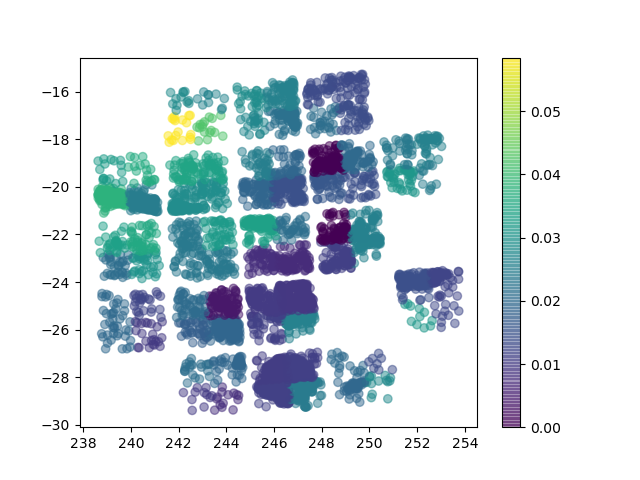

In [5]:
plt.figure()
plt.scatter(d.RAJ2000,d.DecJ2000,c=exs,alpha=.5)
plt.colorbar()

In [14]:
ra = np.arange(np.nanmin(d.RAJ2000),np.nanmax(d.RAJ2000),.01)
dec = np.arange(np.nanmin(d.DecJ2000),np.nanmax(d.DecJ2000),.01)
ra, dec = np.meshgrid(ra, dec)
coords = SkyCoord(ra*u.deg, dec*u.deg,
                  distance=100.*u.kpc, frame='icrs')

bayestar = BayestarQuery()
Av_bayestar = bayestar(coords, mode='median')

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 31.990 s
  pix_info:   0.434 s
   samples:  21.462 s
      best:   4.149 s
       nan:   0.174 s
      sort:   5.624 s
       idx:   0.147 s


<IPython.core.display.Javascript object>


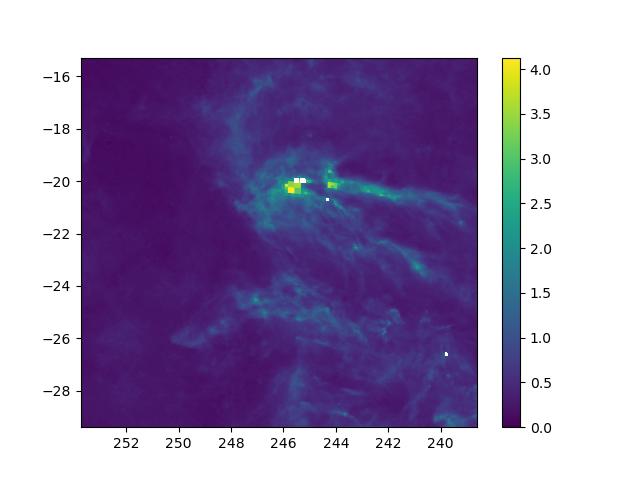

In [15]:
plt.figure()
plt.imshow(Av_bayestar,vmin=0.,extent=[ra[-1,-1],ra[0,0],dec[0,0],dec[-1,-1]])
plt.colorbar()
#plt.scatter(d.RAJ2000,d.DecJ2000,marker='.',c=exs,alpha=.5)

# just the stars

In [115]:
coords = SkyCoord(d.RAJ2000.values*u.deg, d.DecJ2000.values*u.deg,
                  distance=1.*u.kpc, frame='icrs')

bayestar = BayestarQuery(max_samples=1)
Av_bayestar = bayestar(coords)

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 12.489 s
  pix_info:   0.380 s
   samples:   3.293 s
      best:   3.277 s
       nan:   0.022 s
      sort:   5.402 s
       idx:   0.116 s


In [116]:
Av_bayestar-exs

array([0.20165812, 0.20218504, 0.39218502, ..., 0.596958  , 0.79695799,
       0.71695795])

<IPython.core.display.Javascript object>


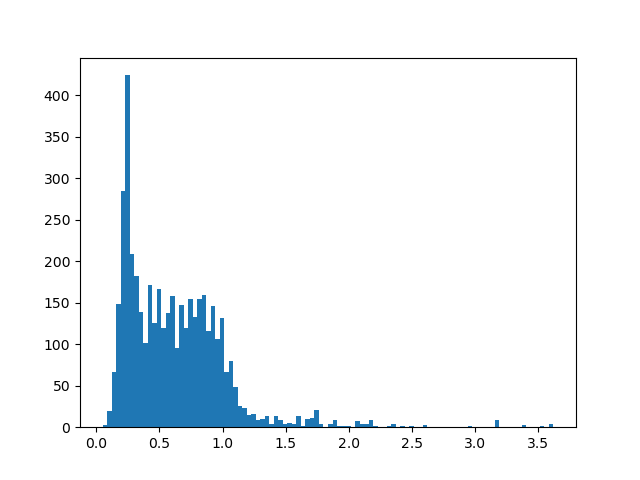

In [117]:
plt.figure()
plt.hist(Av_bayestar.flatten(),bins=100);
#plt.hist(exs,alpha=0.5);